# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

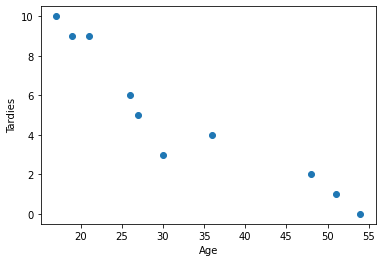

In [3]:
plt.scatter(x=student_data.X, y=student_data.Y)
plt.xlabel("Age")
plt.ylabel("Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- We can clearly appreciate that is a linear function that decreases as students get older 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# The difference is that the covariance gives the direction (positive or negative) between the variables.
# The correlation gives this plus the strength of the correlation.

print('Correlación Pearson: ', student_data['X'].corr(student_data['Y'], method='pearson'))
print(np.cov(student_data['X'], student_data['Y']))

Correlación Pearson:  -0.9391626886887122
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
lr = LinearRegression()
x = student_data[["X"]]
y = student_data.Y
lr.fit(x, y)

LinearRegression()

In [6]:
student_data["Tardies_sklearn"] = lr.predict(x)

- I am using linear regression. Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable.

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

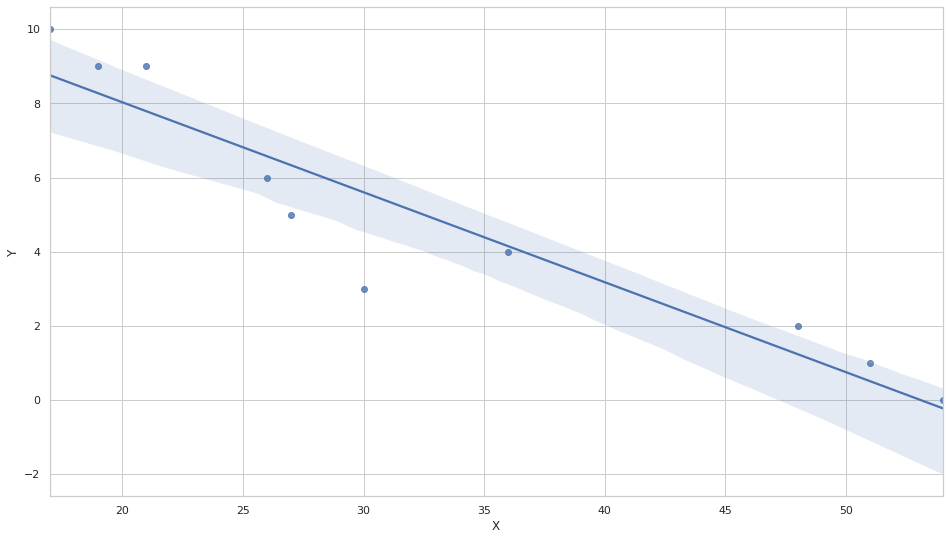

In [7]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16, 9)})
sns.set_style('whitegrid')
sns.regplot(x="X", y="Y", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
print("MAE: " , metrics.mean_absolute_error(student_data.X, student_data.Tardies_sklearn))
print("MSE: " , metrics.mean_squared_error(student_data.X, student_data.Tardies_sklearn))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(student_data.X, student_data.Tardies_sklearn)))

MAE:  28.0
MSE:  1044.8680798152643
RMSE:  32.32441924946625


Calculation of mean absolute error, mean squared error and mean squared error

- **MAE** is the easiest to understand, because it is the mean error.
- **MSE** is more popular than MAE, because MSE "penalises" larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**, because we want to minimise them.

In [9]:
results = smf.ols("X ~ Y", data=student_data).fit()
results.summary()

/home/bertrangs/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        19:05:11   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Y             -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can appreciate that is a linear function that decreases as students get older.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [10]:
df = pd.read_csv('vehicles.csv')
df.rename(columns={"Fuel Barrels/Year": "Fuel_Barrels_per_Year",
          "Combined MPG": "Combined_MPG", "Fuel Cost/Year": "Fuel_Cost_per_Year",
                   "CO2 Emission Grams/Mile": "CO2_Emission_Grams_per_Mile"}, inplace = True)

In [11]:
df[df.columns[1:]].corr()['CO2_Emission_Grams_per_Mile'][:]

Year                          -0.222300
Engine Displacement            0.803520
Cylinders                      0.752393
Fuel_Barrels_per_Year          0.986189
City MPG                      -0.894139
Highway MPG                   -0.926405
Combined_MPG                  -0.926229
CO2_Emission_Grams_per_Mile    1.000000
Fuel_Cost_per_Year             0.930865
Name: CO2_Emission_Grams_per_Mile, dtype: float64

In [12]:
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Year + Cylinders + Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.687e+05
Date:                         Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                                 19:05:11   Log-Likelihood:            -1.5173e+05
No. Observations:                        35952   AIC:                         3.035e+05
Df Residuals:                            35946   BIC:                         3.035e+05
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               769.8883     19.392     39.702      0.000     731.880     807.897
Year                     -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                 1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_per_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_per_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------------------

### ***OLS concepts***

**R2** : The coefficient of determination measures how much of the variance of 𝑦 is explained by the model. If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is zero.

**𝑅¯2** : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analysed case) and the amount of data 𝑁.

**P value** The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values are used to determine which terms should be kept in the regression model.
